# An analysis on Gaussian Elimination and Interpolation Algorithms

## 1.1: The solution of $n$ equations in $n$ unknowns

### The General Problem

Consider a set of $n$ equations in $n$ unknowns that has solutions $b_1,b_2,...,b_n$. This may be written as:

$$a_{11}x_1+a_{12}x_2+...+a_{1n}x_n = b_1$$
$$a_{21}x_1+a_{22}x_2+...+a_{2n}x_n = b_2$$
$$ . $$
$$ . $$
$$ . $$
$$a_{n1}x_1+a_{n2}x_2+...+a_{nn}x_n = b_n$$

Or in sigma notation this may be expressed as:

$$\sum_{k=1}^{N} A_{jk} x_{k} = b_{j}$$

Where $j$ ranges from $1 \ldots n$. 
This can be more formally written in matrix notation, let $A$ be the matrix of coefficients and $b$ be the solution vector thus we have:

$$\mathbf{Ax} = \mathbf{b}$$

We wish to develop an algorithmic process which takes both $A$ and $b$ as inputs and solves for $\mathbf{x}$. Gaussian elimination may be utilised here.

Below is a general function for Gaussian Elimination along with some useful minor functions to assist with the readability of the notebook. The `GaussElim` function takes two input arrays $A$ and $b$ and returns the solution vector $x$ for the system.

In [57]:
##Necessary imports
import numpy as np 
import matplotlib.pyplot as plt 

# Useful utility functions that will print out the numerical contents of matrices and matrix equations

# sympy helps us to print matrix equations in an easier-to-read format
from sympy import Matrix, pprint, Eq, UnevaluatedExpr, symbols

def PrintMxEqualsB(M, x, b):
    # Prints something like "Mx = b",
    # where x can be either a vector of numbers or a string (e.g. 'x') if we want it to be printed out as an unknown.
    if isinstance(x, str):
        x = symbols(x)
    else:
        x = Matrix(np.array(x))
    pprint(Eq(UnevaluatedExpr(Matrix(np.array(M))) * UnevaluatedExpr(x), UnevaluatedExpr(Matrix(np.array(b)))), num_columns=200)
    
def PrintAEqualsB(a, b):
    # Prints something like "a = b", i.e. displays a comparison between two vectors that are expected to be equal.
    # Frustratingly, no amount of using UnevaluatedExpr seems to be able to prevent it just printing 'True'
    # if a and b are identically equal. That is not what I am wanting it to do,
    # but I suppose it is behaviour that we can work with.
    pprint(Eq(UnevaluatedExpr(Matrix(np.array(a))), UnevaluatedExpr(Matrix(np.array(b)))))
    
def PrintMatrix(a):
    # Just prints out a prettified version of the matrix a
    pprint(UnevaluatedExpr(Matrix(np.array(a))))
    
def PrintVector(a):
    # Just prints out a prettified version of the vector a
    # This is defined separately to PrintMatrix, for convenience and readability, 
    # but we actually use exactly the same code as for a matrix.
    PrintMatrix(a)
    

    
#GaussElim function with input arrays A and b. 
#The argument for verbose prints the internal working using the utility functions above
#The argument for decimals allows a user to specific the precision of a solution. 
    
def GaussElim(A, b, ptol=np.spacing(1), verbose=False, decimals=None): 
    """Gaussian Elimination Function (No Pivoting)
    
    Args:
        A:        Matrix representing system of equations
        b:        Vector representing right-hand side of equation system
        ptol:     Optional error tolerance used to detect case of a zero pivot. 
                  If not supplied, will default to 50*np.spacing(1)
        verbose:  Optional boolean to show internal working 
        decimals: Optional number of decimal points to round calculation to 
                  (simulates less accurate computation)
        
    Returns:
        x: Vector representing solution to the equation system
    """
    
    a = np.array(A).astype(float)
    b = np.array(b).astype(float) 
    b_orig = np.array(b)
    
    m, n = np.shape(a) 
    
    #Exception handling, checks if the matrix is square or not, if not an error is raised as the function will fail
    if m != n: 
        raise Exception("Matrix A needs to be square!")
        
    
    #Perform Gaussian Elimination
    for j in range(0,n-1):
        pivot = a[j,j]
        
        #Exception handling, checks if the pivot is equal to zero which would lead to a failure. 
        if abs(pivot) < ptol: 
            raise Exception("Zero Pivot Encountered") 
        
        for i in range(j+1,n):
            multiplier = a[i,j]/pivot
            if decimals != None: 
                multiplier = np.around(multiplier, decimals) 
            a[i,:] = a[i,:] - a[j,:]*multiplier
            b[i] = b[i] - b[j]*multiplier 
        
        #Conditional Statement, allows the printing out of the internal working is a user desires so
        if verbose == True:
            print("\nAfter elimination in column {0} with pivot = {1}:\n".format(j, pivot)) 
            PrintMxEqualsB(a, "x", b)
            
    #Perform Back Substitution 
    x = np.zeros((n,1)) 
    x[n-1] = b[n-1]/a[n-1,n-1] 
    
    #Back substitution from the nth x element to the 1st x element
    for j in range(n-2, -1, -1):
        x[j] = (b[j] - np.dot(a[j,j+1:n], x[j+1:n]))/a[j,j] 
        

    #Returns a 1xn array of solutions for the system
    return(x.flatten())

To verify if the above `GaussElim` function acts as expected, a test system was supplied, one which is fairly simplistic to solve and requires no partial pivoting. Consider the system:

$$ x_1 + 2x_2 - x_3 + 0x_4 = 2$$
$$ 0x_1 + x_2 + x_3 + -2x_4 = -3$$
$$ 2x_1 + 4x_2 + x_3 -3x_4 = -2$$
$$ x_1 -4x_2 - 7x_3 -x_4 = -19$$

In the form $\mathbf{Ax} = \mathbf{b}$ this is:

$$ \left(\begin{array}{cc} 
1 & 2 & -1 & 0\\
0 & 1 & 1 & -2\\
2 & 4 & 1 & -3\\
1 & -4 & -7 & -1
\end{array}\right)
\left(\begin{array}{cc} 
x_1\\ 
x_2\\
x_3\\
x_4
\end{array}\right)
=
\left(\begin{array}{cc} 
2\\ 
-3\\
-2\\
-19
\end{array}\right)$$ 

This system has a particular solution of $x_1 = -1, x_2 = 2, x_3 = 1, x_4 = 3$. This may be verified via the `GaussElim` function as seen below:

In [58]:
# Defines matrix as the coefficient matrix, an array conversion from a list of lists
matrix = np.array([[1,2,-1,0],[0,1,1,-2],[2,4,1,-3],[1,-4,-7,-1]])

# Defines soln as the Solution vector to the system of equations, an array conversion from a list
soln = np.array([2,-3,-2,-19])

#Calls on function PrintMxEqualsB to verify that the above conversions are a true representation of the system described
PrintMxEqualsB(matrix, 'x', soln)

#Sets x_soln equal to the returned value from the call to the function GaussElim.
#The parameters of the function are set to the coefficient matrix as A and solution vector as b 
#with the verbose argument set to true to allow further analysis of the method.
x_soln = GaussElim(matrix, soln, verbose=True)

print("\nx1 = " + str(x_soln[0]) + ", x2 = " + str(x_soln[1]) +", x3 = " + str(x_soln[2]) + ", x4 = " + str(x_soln[3]))

⎡1  2   -1  0 ⎤     ⎡ 2 ⎤
⎢             ⎥     ⎢   ⎥
⎢0  1   1   -2⎥     ⎢-3 ⎥
⎢             ⎥⋅x = ⎢   ⎥
⎢2  4   1   -3⎥     ⎢-2 ⎥
⎢             ⎥     ⎢   ⎥
⎣1  -4  -7  -1⎦     ⎣-19⎦

After elimination in column 0 with pivot = 1.0:

⎡1.0  2.0   -1.0  0.0 ⎤     ⎡ 2.0 ⎤
⎢                     ⎥     ⎢     ⎥
⎢0.0  1.0   1.0   -2.0⎥     ⎢-3.0 ⎥
⎢                     ⎥⋅x = ⎢     ⎥
⎢0.0  0.0   3.0   -3.0⎥     ⎢-6.0 ⎥
⎢                     ⎥     ⎢     ⎥
⎣0.0  -6.0  -6.0  -1.0⎦     ⎣-21.0⎦

After elimination in column 1 with pivot = 1.0:

⎡1.0  2.0  -1.0   0.0 ⎤     ⎡ 2.0 ⎤
⎢                     ⎥     ⎢     ⎥
⎢0.0  1.0  1.0   -2.0 ⎥     ⎢-3.0 ⎥
⎢                     ⎥⋅x = ⎢     ⎥
⎢0.0  0.0  3.0   -3.0 ⎥     ⎢-6.0 ⎥
⎢                     ⎥     ⎢     ⎥
⎣0.0  0.0  0.0   -13.0⎦     ⎣-39.0⎦

After elimination in column 2 with pivot = 3.0:

⎡1.0  2.0  -1.0   0.0 ⎤     ⎡ 2.0 ⎤
⎢                     ⎥     ⎢     ⎥
⎢0.0  1.0  1.0   -2.0 ⎥     ⎢-3.0 ⎥
⎢                     ⎥⋅x = ⎢     ⎥
⎢0.0  0.0  3.0   -3.

The function behaves as expected and yields the correct solution. Notice that the solution is stated in the form of a floating point number rather than an integer. This due to the section in the `GaussElim` function `np.array(A).astype(float)` and `np.array(b).astype(float)`. These fragments of the function convert both the input integer arrays to floating point number arrays. The need for this conversion is highlighted in the following additional example.

Consider the system:

$$ \left(\begin{array}{cc} 
2 & 1 & -3\\
4 & 0 & 1\\
0 & 1 & 2
\end{array}\right)
\left(\begin{array}{cc} 
x_1\\ 
x_2\\
x_3
\end{array}\right)
=
\left(\begin{array}{cc} 
6\\ 
0\\
-3
\end{array}\right)$$ 

This system of equations has a solutions $x_1 = 0.5, x_2 = 1, x_3 = -2$ from this it is evident that $x_1$ cannot be expressed as an integer and so floating point numbers must be used instead. As this conversion is already embedded into the `GaussElim` the function does not fail to return the correct result. 

In [59]:
matrix = np.array([[2,-1,-3],[4,0,1],[0,1,2]])
soln = np.array([6,0,-3])

PrintMxEqualsB(matrix, "x",soln)

x_soln = GaussElim(matrix,soln,verbose=True)

print("\nx1 = " + str(x_soln[0]) + ", x2 = " + str(x_soln[1]) +", x3 = " + str(x_soln[2]))

⎡2  -1  -3⎤     ⎡6 ⎤
⎢         ⎥     ⎢  ⎥
⎢4  0   1 ⎥⋅x = ⎢0 ⎥
⎢         ⎥     ⎢  ⎥
⎣0  1   2 ⎦     ⎣-3⎦

After elimination in column 0 with pivot = 2.0:

⎡2.0  -1.0  -3.0⎤     ⎡ 6.0 ⎤
⎢               ⎥     ⎢     ⎥
⎢0.0  2.0   7.0 ⎥⋅x = ⎢-12.0⎥
⎢               ⎥     ⎢     ⎥
⎣0.0  1.0   2.0 ⎦     ⎣-3.0 ⎦

After elimination in column 1 with pivot = 2.0:

⎡2.0  -1.0  -3.0⎤     ⎡ 6.0 ⎤
⎢               ⎥     ⎢     ⎥
⎢0.0  2.0   7.0 ⎥⋅x = ⎢-12.0⎥
⎢               ⎥     ⎢     ⎥
⎣0.0  0.0   -1.5⎦     ⎣ 3.0 ⎦

x1 = 0.5, x2 = 1.0, x3 = -2.0


## 1.2: Anomalies using the standard Gaussian Elimation Method

Two more matrices were supplied in order to investigate the performance of this Gaussian Elimination method. 

Part A System:

$$ \left(\begin{array}{cc} 
-1 & 2 & 5\\
4 & -6 & -1\\
2 & -1 & 3
\end{array}\right)
\left(\begin{array}{cc} 
x_1\\ 
x_2\\
x_3
\end{array}\right)
=
\left(\begin{array}{cc} 
6\\ 
-1\\
7
\end{array}\right)$$

Part B System:

$$ \left(\begin{array}{cc} 
0 & -1 & 2\\
-1 & 4 & -6\\
3 & 2 & -1
\end{array}\right)
\left(\begin{array}{cc} 
x_1\\ 
x_2\\
x_3
\end{array}\right)
=
\left(\begin{array}{cc} 
1\\ 
-1\\
7
\end{array}\right)$$

For the system in Part A there is nothing in the system that would entice the function to fail and thus yields a sensible solution as seen below

In [60]:
a_coef_matrix = np.array([[-1,2,5],[4,-6,-1],[2,-1,3]])
a_soln_vector = np.array([6,-1,7])

GaussElim(a_coef_matrix, a_soln_vector, verbose=True)


After elimination in column 0 with pivot = -1.0:

⎡-1.0  2.0  5.0 ⎤     ⎡6.0 ⎤
⎢               ⎥     ⎢    ⎥
⎢0.0   2.0  19.0⎥⋅x = ⎢23.0⎥
⎢               ⎥     ⎢    ⎥
⎣0.0   3.0  13.0⎦     ⎣19.0⎦

After elimination in column 1 with pivot = 2.0:

⎡-1.0  2.0   5.0 ⎤     ⎡ 6.0 ⎤
⎢                ⎥     ⎢     ⎥
⎢0.0   2.0  19.0 ⎥⋅x = ⎢23.0 ⎥
⎢                ⎥     ⎢     ⎥
⎣0.0   0.0  -15.5⎦     ⎣-15.5⎦


array([3., 2., 1.])

There is an issue present with the system B. Upon further analysis of the `GaussElim` function it is clear that an error will be returned due to a zero pivot present. This may be illustrated formally by defining an alternate `GaussElim` function that prints out the pivots before the exception is handled.

In [61]:
def GaussElimErr(A, b, ptol=np.spacing(1), verbose=False, decimals=None): 
    """Gaussian Elimination Function (No Pivoting)
    
    Args:
        A:        Matrix representing system of equations
        b:        Vector representing right-hand side of equation system
        ptol:     Optional error tolerance used to detect case of a zero pivot. 
                  If not supplied, will default to 50*np.spacing(1)
        verbose:  Optional boolean to show internal working 
        decimals: Optional number of decimal points to round calculation to 
                  (simulates less accurate computation)
        
    Returns:
        x: Vector representing solution to the equation system
    """
    
    a = np.array(A).astype(float)
    b = np.array(b).astype(float) 
    b_orig = np.array(b)
    
    m, n = np.shape(a) 
    
    #Exception handling, checks if the matrix is square or not, if not an error is raised as the function will fail
    if m != n: 
        raise Exception("Matrix A needs to be square!")
        
    
    #Perform Gaussian Elimination
    for j in range(0,n-1):
        pivot = a[j,j]
        
        # NEW print statement which returns the pivot value assigned, allows debugging of the function
        print(pivot)
        
        #Exception handling, checks if the pivot is equal to zero which would lead to a failure. 
        if abs(pivot) < ptol: 
            raise Exception("Zero Pivot Encountered") 
        
        for i in range(j+1,n):
            multiplier = a[i,j]/pivot
            if decimals != None: 
                multiplier = np.around(multiplier, decimals) 
            a[i,:] = a[i,:] - a[j,:]*multiplier
            b[i] = b[i] - b[j]*multiplier 
        
        #Conditional Statement, allows the printing out of the internal working is a user desires so
        if verbose == True:
            print("\nAfter elimination in column {0} with pivot = {1}:\n".format(j, pivot)) 
            PrintMxEqualsB(a, "x", b)
            
    #Perform Back Substitution 
    x = np.zeros((n,1)) 
    x[n-1] = b[n-1]/a[n-1,n-1] 
    
    #Back substitution from the nth x element to the 1st x element
    for j in range(n-2, -1, -1):
        x[j] = (b[j] - np.dot(a[j,j+1:n], x[j+1:n]))/a[j,j] 
        

    #Returns a 1xn array of solutions for the system
    return(x.flatten())

In [62]:
b_coef_matrix = np.array([[0,-1,2],[-1,4,-6],[3,2,-1]])
b_soln_vector = np.array([1,-1,7])

GaussElimErr(b_coef_matrix, b_soln_vector, verbose=True)

0.0


Exception: Zero Pivot Encountered

From the above output it is evident that a zero pivot was encountered and dealt with accordingly. This zero pivot arised as a result of the assignment `pivot = a[j,j]` where $j$ is 1. This set the value of the pivot to zero which resulted in the runtime error as the statement `abs(pivot) < ptol` evaluated to `True`. This function will always fail for any system where a zero pivot is encountered, systems such as, but not limited to:

$$0x_1+a_{12}x_2+...+a_{1n}x_n = b_1$$
$$a_{21}x_1+a_{22}x_2+...+a_{2n}x_n = b_2$$
$$ . $$
$$ . $$
$$ . $$
$$a_{n1}x_1+a_{n2}x_2+...+a_{nn}x_n = b_n$$

are unsolvable using this method.

It can be concluded that the initial algorithm for the method of Gaussian Elimination is slightly incomplete. It works for square matrices of dimension $n$ that do no contain or result in a zero pivot point.

## 1.3: Gaussian Elimination with Partial Pivoting

A slightly more refined version of Gaussian Elimination is required for those equations that yield zero pivot points; this method is referred to as Gaussian Elimination with Partial Pivoting. This method involves taking the absolute value of the elements in the first column of the coefficient matrix. The largest of these values is then taken as the pivot for that section of operations. This is repeated until a solution is obtained. Below is `GaussElimPivot` which, as the name suggests, considers the need for partial pivoting. 

In [63]:
def GaussElimPivot(A, b, ptol=50*np.spacing(1), verbose=False, decimals=None):
    """Gaussian Elimination Function (with partial pivoting)
    
    Args:
        A: Matrix representing system of equations
        b: Vector representing right-hand side of equation system 
        ptol: Optional error tolerance, used to detect the case of a zero pivot.
              If not supplied it will default to 50*np.spacing(1)
        show: Optional boolean to show internal working
        decimals: Optional number of decimal points to round calculation to
                  (Simulates less accurate computation) 
                  
    Returns:
        x: Vector representing solution to the equation system 
    """
    
    a = np.array(A).astype(float) 
    b = np.array(b).astype(float)
    b_orig = np.array(b).astype(float) 
    
    m,n = np.shape(a) 
    
    if m != n:
        raise Exception("Matrix A needs to be square") 
        
    
    #Perform Gaussian Elimination
    for i in range(0,n-1):
        pivot = np.amax(np.abs(a[i:n,i])) 
        p = np.argmax(np.abs(a[i:n,i]))
        
        ip = i+p
        
        if ip != i:
            a[[i,ip],:] = a[[ip,i],:]
            b[[i,ip]] = b[[ip,i]] 
            
                
        pivot = a[i,i] 
        if abs(pivot) < ptol:
            raise Exception("Zero pivot encountered after row exchange") 
            
        for k in range(i+1,n):
            multiplier = a[k,i]/pivot
            a[k,:] = a[k,:] - a[i,:]*multiplier
            b[k] = b[k] - b[i]*multiplier
            
            if decimals != None: 
                a[k,:] = np.around(a[k,:], decimals)
                b[k] = np.around(b[k], decimals) 
            
        if verbose == True:
            print("After elimination in column {0} with pivot = {1}".format(i, pivot)) 
            PrintMxEqualsB(a, "x", b)

    #Back Substitution
    x = np.zeros((n,1)) 
    x[n-1] = b[n-1]/a[n-1,n-1] 
    
    for j in range(n-2, -1, -1):
        x[j] = (b[j] - np.dot(a[j,j+1:n], x[j+1:n]))/a[j,j] 
        
    
    return(x.flatten())

This method may be used to evaulate a solution for system B previously described:

In [64]:
PrintMxEqualsB(b_coef_matrix,"x", b_soln_vector)
GaussElimPivot(b_coef_matrix,b_soln_vector,verbose=True)

⎡0   -1  2 ⎤     ⎡1 ⎤
⎢          ⎥     ⎢  ⎥
⎢-1  4   -6⎥⋅x = ⎢-1⎥
⎢          ⎥     ⎢  ⎥
⎣3   2   -1⎦     ⎣7 ⎦
After elimination in column 0 with pivot = 3.0
⎡3.0        2.0               -1.0       ⎤     ⎡      7.0       ⎤
⎢                                        ⎥     ⎢                ⎥
⎢0.0  4.66666666666667  -6.33333333333333⎥⋅x = ⎢1.33333333333333⎥
⎢                                        ⎥     ⎢                ⎥
⎣0.0        -1.0               2.0       ⎦     ⎣      1.0       ⎦
After elimination in column 1 with pivot = 4.666666666666667
⎡3.0        2.0               -1.0       ⎤     ⎡      7.0       ⎤
⎢                                        ⎥     ⎢                ⎥
⎢0.0  4.66666666666667  -6.33333333333333⎥⋅x = ⎢1.33333333333333⎥
⎢                                        ⎥     ⎢                ⎥
⎣0.0        0.0         0.642857142857143⎦     ⎣1.28571428571429⎦


array([1., 3., 2.])

Analysing the above output indicates that a pivot of 3 was established rather than 0 which is to be expected as `abs(3)` is greater than both `abs(-1)` and `abs(0)`. Rows 1 and 3 have been swapped to allow Gaussian Elimination to take place. Afterwards, the pivot for the 2nd column was established via the same method. This process is repeated until a solution is obtained. 

Another two test systems were supplied to investigate the responses of both `GaussElim` and `GaussElimPivot` to determine which of the two algorithms is more fit for purpose:

Part A System:

$$ \begin{aligned} 6x_{1} + 2x_{2} + 2x_{3} = -2 \\ 2x_{1} + \frac{2}{3}x_{2} + \frac{1}{3}x_{3} = 1 \\ x_{1} + 2x_{2} -x_{3} = 0 \end{aligned} $$

Part B System:

$$ \begin{aligned} 6x_{1} + 2x_{2} + 2x_{3} = -2 \\ 2x_{1} + 0.6667x_{2} + 0.3333x_{3} = 1 \\ x_{1} + 2x_{2} -x_{3} = 0 \end{aligned} $$

From the above equations it is resonable to expect the solutions to each system will be very approximately equal regardless of the algorithm used. In effect, system B approximates system A. 

System A was then supplied to both `GaussElim` and `GaussElimPivot` respectively, the results of which are displayed below:

In [65]:
a_coefficients = np.array([[6,2,2],[2,2/3,1/3],[1,2,-1]])
a_soln = np.array([-2,1,0])

GaussElim(a_coefficients, a_soln, verbose=True)


After elimination in column 0 with pivot = 6.0:

⎡6.0        2.0                2.0        ⎤     ⎡      -2.0       ⎤
⎢                                         ⎥     ⎢                 ⎥
⎢0.0        0.0         -0.333333333333333⎥⋅x = ⎢1.66666666666667 ⎥
⎢                                         ⎥     ⎢                 ⎥
⎣0.0  1.66666666666667  -1.33333333333333 ⎦     ⎣0.333333333333333⎦


Exception: Zero Pivot Encountered

As pivoting was not included the function returned a runtime error indicating a zero pivot was encountered this can be demonstrated by passing the same inputs to the alterntave version of `GaussElim` defined earlier:

In [66]:
GaussElimErr(a_coefficients, a_soln, verbose=True)

6.0

After elimination in column 0 with pivot = 6.0:

⎡6.0        2.0                2.0        ⎤     ⎡      -2.0       ⎤
⎢                                         ⎥     ⎢                 ⎥
⎢0.0        0.0         -0.333333333333333⎥⋅x = ⎢1.66666666666667 ⎥
⎢                                         ⎥     ⎢                 ⎥
⎣0.0  1.66666666666667  -1.33333333333333 ⎦     ⎣0.333333333333333⎦
0.0


Exception: Zero Pivot Encountered

A value of zero has been printed as one of the pivots which confirms the error handling is working as intended.

In [67]:
GaussElimPivot(a_coefficients,a_soln,verbose=True)

After elimination in column 0 with pivot = 6.0
⎡6.0        2.0                2.0        ⎤     ⎡      -2.0       ⎤
⎢                                         ⎥     ⎢                 ⎥
⎢0.0        0.0         -0.333333333333333⎥⋅x = ⎢1.66666666666667 ⎥
⎢                                         ⎥     ⎢                 ⎥
⎣0.0  1.66666666666667  -1.33333333333333 ⎦     ⎣0.333333333333333⎦
After elimination in column 1 with pivot = 1.6666666666666667
⎡6.0        2.0                2.0        ⎤     ⎡      -2.0       ⎤
⎢                                         ⎥     ⎢                 ⎥
⎢0.0  1.66666666666667  -1.33333333333333 ⎥⋅x = ⎢0.333333333333333⎥
⎢                                         ⎥     ⎢                 ⎥
⎣0.0        0.0         -0.333333333333333⎦     ⎣1.66666666666667 ⎦


array([ 2.6, -3.8, -5. ])

As `GaussElimPivot` returns a valid solution it can be concluded that `GaussElimPivot` is a more stable mathematical algorithm whereas `GaussElim` is relatively unstable. 

System B was then supplied to both `GaussElim` and `GaussElimPivot` respectively, the results of which are displayed below:

In [68]:
b_coefficients = np.array([[6,2,2],[2,0.6667,0.3333],[1,2,-1]])
b_soln = np.array([-2,1,0])

GaussElim(b_coefficients,b_soln,verbose=True)


After elimination in column 0 with pivot = 6.0:

⎡6.0          2.0                 2.0        ⎤     ⎡      -2.0       ⎤
⎢                                            ⎥     ⎢                 ⎥
⎢0.0  3.33333333333297e-5  -0.333366666666667⎥⋅x = ⎢1.66666666666667 ⎥
⎢                                            ⎥     ⎢                 ⎥
⎣0.0   1.66666666666667    -1.33333333333333 ⎦     ⎣0.333333333333333⎦

After elimination in column 1 with pivot = 3.333333333332966e-05:

⎡6.0          2.0                 2.0        ⎤     ⎡      -2.0       ⎤
⎢                                            ⎥     ⎢                 ⎥
⎢0.0  3.33333333333297e-5  -0.333366666666667⎥⋅x = ⎢1.66666666666667 ⎥
⎢                                            ⎥     ⎢                 ⎥
⎣0.0          0.0           16667.0000000018 ⎦     ⎣-83333.0000000092⎦


array([ 2.599928, -3.799904, -4.99988 ])

From the working displayed above it is evident that without partial pivoting the values on the last row become increasingly unstable. In this specific case the last row values are around four orders of magnitude greater than any other values. This instability increases the required computational power to obtain a resonable solution. For this system a resonable solution may be obtained as the dimension of the matrix is relatively small. 

In [69]:
GaussElimPivot(b_coefficients,b_soln,verbose=True)

After elimination in column 0 with pivot = 6.0
⎡6.0          2.0                 2.0        ⎤     ⎡      -2.0       ⎤
⎢                                            ⎥     ⎢                 ⎥
⎢0.0  3.33333333333297e-5  -0.333366666666667⎥⋅x = ⎢1.66666666666667 ⎥
⎢                                            ⎥     ⎢                 ⎥
⎣0.0   1.66666666666667    -1.33333333333333 ⎦     ⎣0.333333333333333⎦
After elimination in column 1 with pivot = 1.6666666666666667
⎡6.0        2.0                2.0       ⎤     ⎡      -2.0       ⎤
⎢                                        ⎥     ⎢                 ⎥
⎢0.0  1.66666666666667  -1.33333333333333⎥⋅x = ⎢0.333333333333333⎥
⎢                                        ⎥     ⎢                 ⎥
⎣0.0        0.0             -0.33334     ⎦     ⎣     1.66666     ⎦


array([ 2.599928, -3.799904, -4.99988 ])

Applying `GaussElimPivot` to the matrix instead yields a much more stable solution which requires considerably less computational power as the lower order terms steadily will decrease in value. It is also evident that the obtained solutions to the matrix are very close approximations to the solution obtained for system A.

From the above results to system A and B it can be concluded that `GaussElimPivot` is a more stable and reliable mathematical algorithm than `GaussElim`. `GaussElim` is rendered unstable if a zero pivot is encountered and has a tendancy to generate unstable pivots leading to very large numbers on the final row. `GaussElimPivot` is a more viable choice of algorithm as the pivots selected are more resonable meaning it is less likely very large or very small numbers are subtracted from one another. In terms of computational strain, if the coefficients of the system are members of the integers, in otherwords it is an idealised system, then `GaussElim` may be used as it does no require the additional zero pivot check. If the system is a real valued system, where the coefficients are members of the real numbers, then `GaussElimPivot` should be used as it is more reliable and does not produce unstable results.  

## 1.4: Limitations on accuracy with Partial Pivoting

From the previous section it is implied that Gaussian Elimination with Partial Pivoting is the most accurate algorithm for solving the general problem described in section 1.1, this is not the case. The algorithm for `GaussElimPivot` is certainly more stable than `GaussElim` but by no means is it more accurate.  To investigate the accuracy of the `GaussElimPivot` algorithm the decimal precision can be varied. 

Consider the system:

$$\begin{pmatrix}0.780 & 0.563 \\ 0.913 & 0.659 \end{pmatrix} \begin{pmatrix} x_{1} \\ x_{2} \end{pmatrix} = \begin{pmatrix} 0.217 \\ 0.254 \end{pmatrix}$$

To investigate the accuracy if the `GaussElimPivot` algorithm the decimal argument can be set to a variable that iterates over a desired range for example 1 to 20. The decimal arguement within the function rounds each elements new value after two reduction to the provided number of decimals. This can lead to errors if the supplied decimal precision is not within a certain threshold. Iterating over the numbers 1 to 20 yields:

In [70]:
import warnings

# Filters out an expected warning for an invalid value found
warnings.filterwarnings("ignore", message="invalid value encountered")

oefficients = np.array([[0.780,0.563],[0.913,0.659]])
solns = np.array([0.217,0.254])

#Iterates over a range of values 1 to 20
for i in range(1,20):
    # Decimal argument is iterated from 1 to 20
    print("Solution at decimal precision == " +str(i), GaussElimPivot(coefficients, solns, decimals=i))

Solution at decimal precision == 1 [nan nan]
Solution at decimal precision == 2 [nan nan]
Solution at decimal precision == 3 [nan nan]
Solution at decimal precision == 4 [nan nan]
Solution at decimal precision == 5 [nan nan]
Solution at decimal precision == 6 [ 1. -1.]
Solution at decimal precision == 7 [ 1. -1.]
Solution at decimal precision == 8 [ 1. -1.]
Solution at decimal precision == 9 [ 1. -1.]
Solution at decimal precision == 10 [ 1. -1.]
Solution at decimal precision == 11 [ 1. -1.]
Solution at decimal precision == 12 [ 1. -1.]
Solution at decimal precision == 13 [ 1. -1.]
Solution at decimal precision == 14 [ 1. -1.]
Solution at decimal precision == 15 [ 1. -1.]
Solution at decimal precision == 16 [ 1. -1.]
Solution at decimal precision == 17 [ 1. -1.]
Solution at decimal precision == 18 [ 1. -1.]
Solution at decimal precision == 19 [ 1. -1.]


It is evident that with increasing decimal precision the solutions tend towards a steady value of $x_1 = 1$ and $x_2 = -1$ and the threshold for this system is at the 6th decimal place. Smaller than 6 decimal places yields errors due to the numbers being rounded too quickly. The lesser the decimal precision the more unstable ther result is. This indicates that the original coeffactor matrix is ill-conditioned as a slight change in the values yields a significantly divergent solution. 

Leaving out the decimal argument for the function yields the most accurate solution as the values are not rounded in the first place. 

To conclude, the accuracy of the algorithm is dependant upon the condition of the matrix, the more ill-conditioned the matrix is the higher the decimal precision must be in order to recieve a true solution. 

## 1.5: The singularity of a Matrix

The singularity of a matrix $\mathbf A$ is defined as a measure of how close the determinant of a matrix $\det(\mathbf{A})$ is to zero. The function `np.linalg.cond()` returns the condition number of a matrix, the higher the condition number is the closer the matrix is to being singular. The more singular a matrix is the more volatile the solution set can become thus requiring the `GaussElimPivot` function to be taken to higher numbers of decimal precision for a true solution. The condition number for previous coefficient matricies is calculated and tabulated below:

In [71]:
print(np.around(np.linalg.cond(coefficients),3))
print(np.around(np.linalg.cond(b_coefficients),3))
print(np.around(np.linalg.cond(a_coefficients),3))
print(np.around(np.linalg.cond(a_coef_matrix),3))

2193219.0
31.502
31.502
11.766


|Matrix (# section)|Condition Value|
|:--:|:--:|
|Matrix A Sec. 1.2|11.766|
|Matrix A Sec. 1.3|31.502|
|Matrix B Sec. 1.3|31.502|
|System Sec. 1.4|2193219.0|

From this table it is evident that the previous matrix in section 1.4 has a higher degree of singularity compared to the rest of the matricies involved within this chapter. The two matrices from section 1.3 have approximately identical condition numbers and hence they behave the same but may have some degree of volatility to their solutions as explored in section 1.3. 

`np.linalg.cond()` can be used as rudimentary test to give an indication of the decimal precision the `GaussElimPivot` algorithm needs to obtain in order for the solution to be equivalent to a true solution.

## 1.6: Comparisons and Conclusion

In terms of mathematical stability, `GaussElimPivot` is the superior algorithm to `GaussElim`. The latter algorithm may be suitable for a specific subset of matricies, those of which do not have zero pivot points and are numerically stable. In general however most systems will have zero pivots and may even been ill-conditioned hence it is far more reasonable to use `GaussElimPivot`.  

In terms of accuracy, both systems are equally as accurate as each other the only thing limiting the accuracy of the solution is the inherent limit for computers to store so much information. This may become an issue with certain ill-conditioned systems which have an extremely large condition number. The condition number of a system may be determined via `np.linalg.cond()` beforehand to give an indication as to the required decimal precision. 


## 2.1:  Polynomial Interpolation 

A common way for providing a fit to a data set is to use polynomial interpolation. Given a selection of points $x_0,x_1,...,x_n$ and the corresponding $f(x_0),f(x_1),...,f(x_n)$ points an estimation of the function may be given in the form of an $n-1$ order polynomial expression where $n$ is the number of given points. 
By the above criteria the fitted polynomial in sigma notation can be expressed as:

$$F(x) = \sum_{j=0}^{N-1} a_{j}x^{j} $$

Where $F(x)$ is the fitting polynomial.
Provided a select set of values $y_0,y_1,...,y_k$ are given a system of $k$ equations may be formed. This system takes the form:

$$ \sum_{j=0}^{N-1} a_{j} x_{k}^{j} = y_{k} $$

This form may be solved using the `GaussElimPivot` function previously defined in section 1 the result of which provides the $a_0,a_1,...,a_{j}$ coefficients for the $n-1$ order polynomial fit. Below is a cell which defines the above fitting algorithm, applies it to a data set and graphs the result.

| $x_{k}$       | $y_{k}$       | 
| :-------------: |:-------------:|
| $-1.0$      | $+3.5$ |
| $-0.5$     | $+0.2$ |
| $+0.0$   | $-2.1$ |
| $+0.5$ | $+1.7$ |
| $+1.0$ | $-3.1$ |


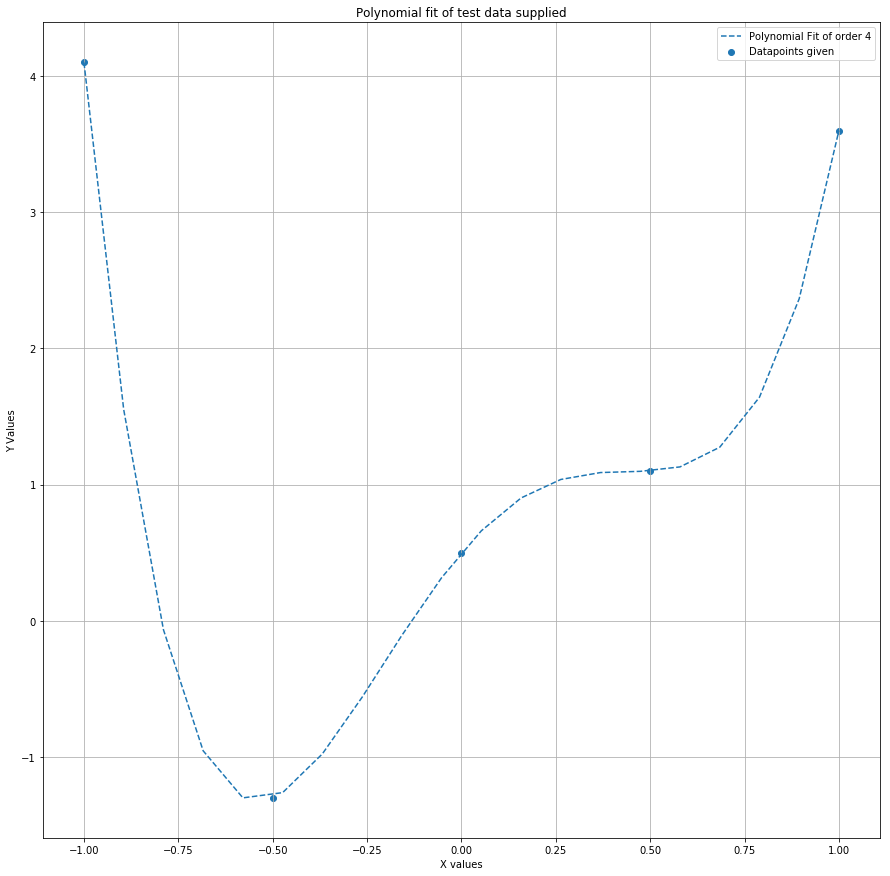

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Returns the value of the polynomial fit at set values of x
def f(x, coeffs):
    
    order = len(coeffs)
    y = 0
    for i in range(order):
        y += coeffs[i]*np.array(x)**i
    return y


# Defines a function which returns the leading coefficients for the polynomial.
# Relies on the user previously running the cell containing the GaussElimPivot function.
def get_coefs(x,y):
    #Creates the coefficent matrix to input into GaussElimPivot function
    N = len(x)
    coef_list = []
    i = 0
    while i < N:
        row = []
        j = 0
        while j < N:
            # Takes the ith element of array x and raises it to the power j
            row.append(x[i]**j)
            j += 1
        # Adds a completed row to a coef list
        coef_list.append(row)
        i += 1
    # Converts list of lists to an array, ready for insertion into GaussElimPivot function
    coefs = np.array(coef_list)
    return GaussElimPivot(coefs,y)


#Input values to be interpolated
x = np.array([-1.0, -0.5, 0.0, 0.5, 1.0])
y = np.array([4.1, -1.3, 0.5, 1.1, 3.6])


#Graphs the Result with the x increment set to 0.1
plt.figure(figsize=(15,15))
plt.plot(np.linspace(-1,1,20), f(np.linspace(-1,1,20), get_coefs(x,y)), label="Polynomial Fit of order " + str(len(x)-1), linestyle="--")
plt.scatter(x,y, label="Datapoints given")
plt.title("Polynomial fit of test data supplied")
plt.xlabel("X values")
plt.ylabel("Y Values")
plt.legend()
plt.grid()
plt.show()

## 2.2: Trigonometric Interpolation

In the case that each $x$ value is given by an expression the above notation may be adapted into the form:

$$ \sum_{j=0}^{N-1} a_{j}g_{j}(x_{k}) = y_{k} $$ 

Where $g_{j}(x_{k})$ is a family of functions, for example trigonometric functions, acting on $x_k$. 
This allows the fitting of periodic data which forms a fourier series. All data of the form:

$$ f(x) = a_{0} + \sum_{n=1}^{\infty}a_{n}\cos{nx} + b_{n}\sin{nx} $$

will be more accurately approximated by this method than a polynomial fit. Below is a cell which outlines this fitting algorithm and graphs the output of the test data supplied. 

| $x_{k}$ | $y_{k}$ |
| :---: | :---: |
| $-3.0999$ | $-0.97309$ |
| $-2.0666$ | $3.5557$ | 
| $-1.0333$ | $1.1402$ |
| $0.0000$ | $1.2000$ |
| $1.0333$ | $2.0412$ |
| $2.0666$ | $-0.39794$ |
| $3.0999$ | $-1.0535$ |




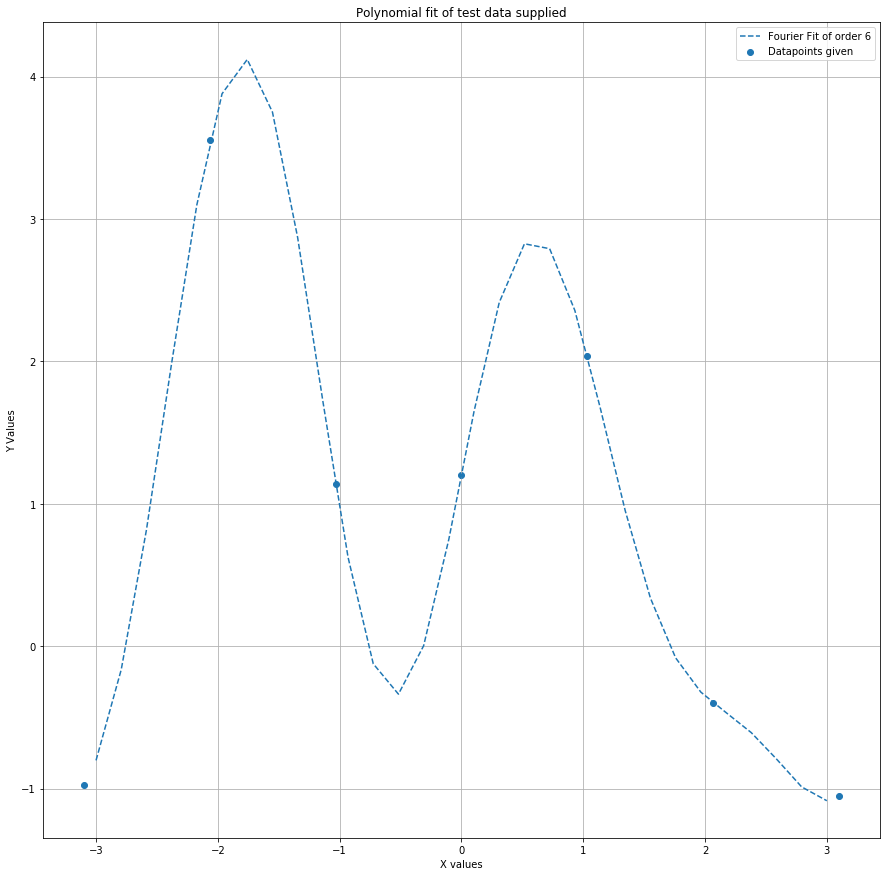

In [73]:
import matplotlib.pyplot as plt
import numpy as np

#Returns value of the fourier series of the function at set values of x 
def g(x,values):
    y = 0
    j = 0
    odd_count = 1
    even_count = 1
    while j < len(values):
        # Checks if the value to add is a0 or not
        if j == 0:
            y += values[j]
        else:
            # Checks if j is even or odd then adds the appropriate value to the value of y
            if j%2 == 0:
                y += values[j]*np.sin(odd_count*x)
                odd_count += 1
            else:
                y += values[j]*np.cos(even_count*x)
                even_count += 1
        j += 1
    return y
    
# Defines a function which returns the leading coefficients for the fourier series.
# Relies on the user previously running the cell containing the GaussElimPivot function.
def get_coefs_fourier(x,y):
    coef_list = []
    N = len(x)
    i = 0
    
    while i < N:
        row = []
        j = 0
        even_count = 1
        odd_count = 1
        while j < N:
            if j == 0:
                row.append(1)
            else:
                if j%2 == 0:
                    row.append(np.sin(odd_count*x[i]))
                    odd_count += 1
                else:
                    row.append(np.cos(even_count*x[i]))
                    even_count += 1
            j += 1
        coef_list.append(row)
        i += 1

    coefs = np.array(coef_list)
    return GaussElimPivot(coefs, y)

#Input values to be interpolated
x = np.array([-3.0999,-2.0666,-1.0333,0.0000,1.0333,2.0666,3.09999]) 
y = np.array([-0.97309, 3.5557, 1.1402, 1.2000, 2.0412, -0.39794, -1.0535])

#Graphs the resulting fourier plot
plt.figure(figsize=(15,15))
plt.plot(np.linspace(-3,3,30), g(np.linspace(-3,3,30),get_coefs_fourier(x,y)), label="Fourier Fit of order " + str(len(x)-1), linestyle="--" )
plt.scatter(x,y, label="Datapoints given")
plt.title("Polynomial fit of test data supplied")
plt.xlabel("X values")
plt.ylabel("Y Values")
plt.legend()
plt.grid()
plt.show()

## 2.3: Comparision between two interpolation strategies

Each method was then applied to the alternate data set to yield the results below

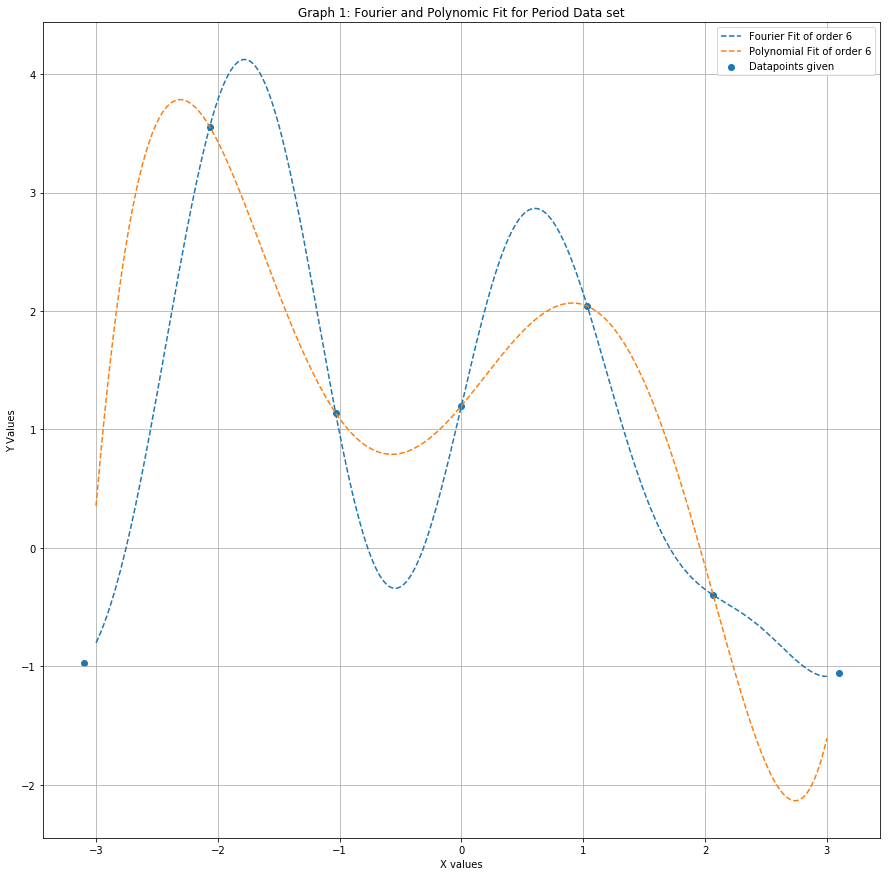

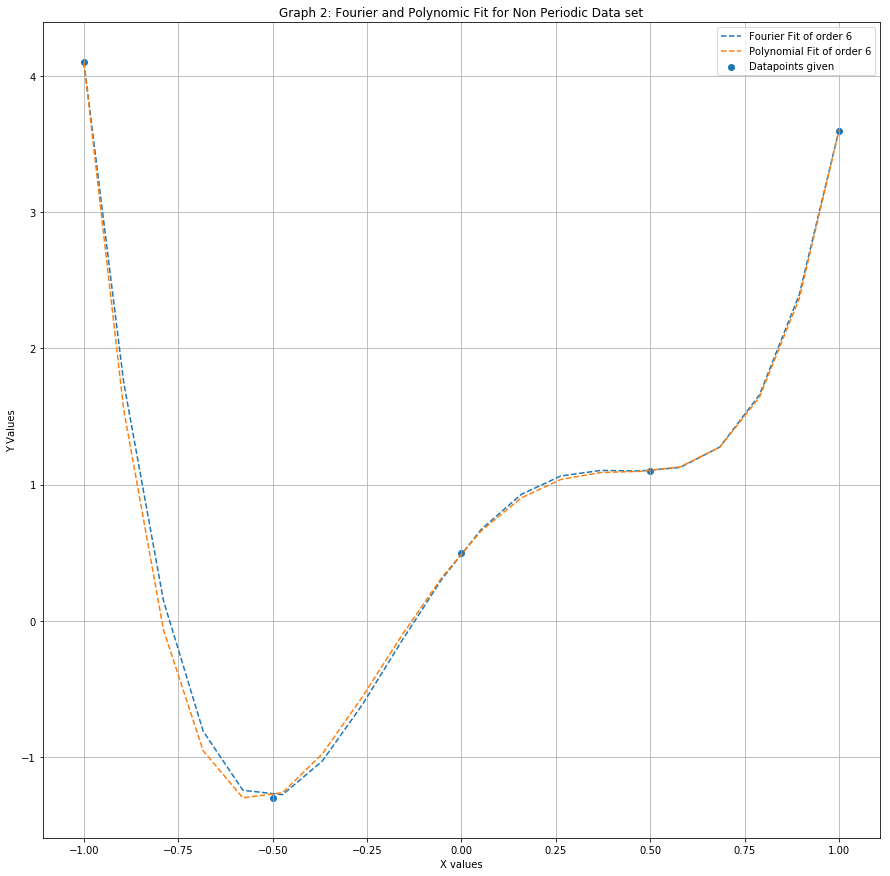

In [74]:
x1 = np.array([-3.0999,-2.0666,-1.0333,0.0000,1.0333,2.0666,3.09999]) 
y1 = np.array([-0.97309, 3.5557, 1.1402, 1.2000, 2.0412, -0.39794, -1.0535])

x2 = np.array([-1.0, -0.5, 0.0, 0.5, 1.0])
y2 = np.array([4.1, -1.3, 0.5, 1.1, 3.6])

plt.figure(figsize=(15,15))
plt.plot(np.linspace(-3,3,300), g(np.linspace(-3,3,300),get_coefs_fourier(x1,y1)), label="Fourier Fit of order " + str(len(x)-1), linestyle="--" )
plt.plot(np.linspace(-3,3,300), f(np.linspace(-3,3,300),get_coefs(x1,y1)), label="Polynomial Fit of order " + str(len(x)-1), linestyle="--" )
plt.scatter(x1,y1, label="Datapoints given")
plt.title("Graph 1: Fourier and Polynomic Fit for Period Data set")
plt.xlabel("X values")
plt.ylabel("Y Values")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15,15))
plt.plot(np.linspace(-1,1,20), g(np.linspace(-1,1,20),get_coefs_fourier(x2,y2)), label="Fourier Fit of order " + str(len(x)-1), linestyle="--" )
plt.plot(np.linspace(-1,1,20), f(np.linspace(-1,1,20),get_coefs(x2,y2)), label="Polynomial Fit of order " + str(len(x)-1), linestyle="--" )
plt.scatter(x2,y2, label="Datapoints given")
plt.title("Graph 2: Fourier and Polynomic Fit for Non Periodic Data set")
plt.xlabel("X values")
plt.ylabel("Y Values")
plt.legend()
plt.grid()
plt.show()



It is evident that from the above outputs, polynomial fits to data sets that may be expressed as fourier sums fail considerably. This is to be expected as polynomials fail to approximate the entirity of a sine or cosine wave but are very good at predicting localised sine and cosine behaviour. From graph 1 it can be seen that the local region around the points defined are approximated reasonably well via the polynomial fit. From graph 2 it can be seen that the polynomial fit and fourier fit are in very good agreement with each other leading to the conclusion that the fourier series fit for a data set is a more robust fit for a general data set.

